<a href="https://colab.research.google.com/github/CJMA010/LSTM-time-series-prediction/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from pandas_datareader.data import DataReader
from datetime import date
from keras.models import Sequential
from keras.layers.core import Dense , Activation
from keras.layers.recurrent import LSTM

import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

code_AA = 'BAMLC0A2CAAEY'
code_TB = 'DGS10'
data_source = 'fred'

In [0]:
start = date(1990, 1, 1)
yield_AA = DataReader(code_AA, data_source, start)
yield_TB = DataReader(code_TB, data_source, start)
yield_concat = pd.concat([yield_AA, yield_TB], axis=1)

In [0]:
yield_concat=yield_concat.rename(columns={code_AA:'yield_AA',code_TB:'yield_TB'})

In [0]:
yield_concat['spread_AA'] = yield_concat.yield_AA - yield_concat.yield_TB

In [0]:
yield_concat['lag_1'] = yield_concat.spread_AA.shift(1)
yield_concat['lag_2'] = yield_concat.spread_AA.shift(2)
yield_concat['lag_3'] = yield_concat.spread_AA.shift(3)
yield_concat['lag_4'] = yield_concat.spread_AA.shift(4)
yield_concat['lag_5'] = yield_concat.spread_AA.shift(5)
yield_concat = yield_concat.dropna()

In [0]:
all_set_columns = ['lag_1','lag_2','lag_3','lag_4','lag_5']
all_set = yield_concat[all_set_columns]
scaler_all_set = preprocessing.MinMaxScaler(feature_range=(-1, 1))
all_set = np.array(all_set).reshape((len(all_set),5 ))
all_set = scaler_all_set.fit_transform(all_set)

In [0]:
single_set = yield_concat['spread_AA']
scaler_single_set = preprocessing.MinMaxScaler( feature_range=(-1, 1))
single_set = np.array(single_set).reshape((len(single_set), 1))
single_set = scaler_single_set.fit_transform(single_set)

In [0]:
train_end = int(len(all_set)*0.66)

x_train=all_set[0:train_end ,]
x_test=all_set[train_end+1:len(all_set),]

y_train=single_set[0:train_end]
y_test=single_set[train_end+1:len(all_set)]

x_train=x_train.reshape(x_train.shape + (1,))
x_test=x_test.reshape(x_test.shape + (1,))

In [0]:
seed = 2016
np.random.seed(seed)
fit1 = Sequential()
fit1.add(LSTM(activation="tanh", input_shape=(5, 1), units=4, recurrent_activation="hard_sigmoid"))
fit1.add(Dense(activation="linear", units=1))

In [0]:
fit1.compile(loss="mean_squared_error", optimizer="rmsprop")
fit1.fit(x_train , y_train , batch_size = 1, epochs = 10, shuffle=False)
fit1.summary()

Epoch 1/10
2702/2702 [==============================] - 13s 5ms/step - loss: 0.0079
Epoch 2/10
2702/2702 [==============================] - 13s 5ms/step - loss: 9.0633e-04
Epoch 3/10
2702/2702 [==============================] - 13s 5ms/step - loss: 7.0900e-04
Epoch 4/10
2702/2702 [==============================] - 13s 5ms/step - loss: 6.3164e-04
Epoch 5/10
2702/2702 [==============================] - 13s 5ms/step - loss: 5.9304e-04
Epoch 6/10
2702/2702 [==============================] - 13s 5ms/step - loss: 5.7394e-04
Epoch 7/10
2702/2702 [==============================] - 13s 5ms/step - loss: 5.5690e-04
Epoch 8/10
2702/2702 [==============================] - 13s 5ms/step - loss: 5.4109e-04
Epoch 9/10
2702/2702 [==============================] - 13s 5ms/step - loss: 5.2443e-04
Epoch 10/10
2702/2702 [==============================] - 13s 5ms/step - loss: 5.2274e-04
_________________________________________________________________
Layer (type)                 Output Shape              Pa

In [0]:
score_train = fit1.evaluate(x_train , y_train,batch_size=1)
score_test = fit1.evaluate(x_test , y_test , batch_size =1)
print ("in train MSE = ", round(score_train ,4))
print ("in test MSE = ", round(score_test,4))

1391/1391 [==============================] - 1s 1ms/step
in train MSE =  0.0192
in test MSE =  0.0083


In [0]:
pred1 = fit1.predict(x_test)
pred1 = scaler_single_set.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))

In [0]:
import matplotlib.pyplot as plt

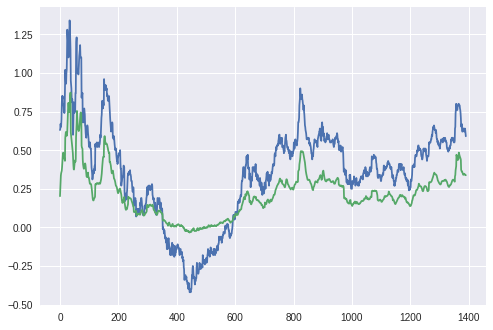

In [0]:
plt1 = plt.plot(scaler_single_set.inverse_transform(np.array(y_test).reshape((len(y_test), 1))))
plt2 = plt.plot(pred1)
plt.show()